# BLEU CHRF damage visualization

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
bleu = pd.read_table('bleu-damage-norecall.tsv', quoting=3, index_col=False)
bleu = bleu.rename(columns={'bleu':'BLEU', 'macrof':'MacroF1', 'microf':'MicroF1', 'macrobleu':'MacroBLEU', 'microbleu':'MicroBLEU'})
bleu.drop(columns=['chrf'], inplace=True)
bleu

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU
0,.,1869,94.91177,99.98495,96.00965,99.67137,95.68407
1,at,250,98.50754,99.98495,99.46440,99.20637,98.59292
2,:,299,98.11789,99.98495,99.35984,99.01944,98.29188
3,that,238,98.52796,99.98495,99.49000,99.37468,98.64910
4,is,344,97.86624,99.98495,99.26381,99.00512,98.05895
...,...,...,...,...,...,...,...
6632,01,1,99.99329,99.98495,99.99573,99.98168,99.99162
6633,089,1,99.99329,99.98495,99.99573,99.98264,99.99166
6634,$,1,99.99329,99.98495,99.99573,99.98293,99.99181
6635,00,1,99.99329,99.98495,99.99573,99.98095,99.99179


In [3]:
chrf = pd.read_table('chrf-damage-norecall.tsv', quoting=3, index_col=False)
chrf['CHRF1'] = 100 * chrf['CHRF1']
chrf['CHRF3'] = 100 * chrf['CHRF3']
chrf

,Type,Frequency,CHRF1,CHRF3
0,with,310,99.1849,98.8892
1,"""",304,99.5120,99.4393
2,.,1869,99.3211,98.8746
3,on,349,99.3419,99.1757
4,at,250,99.5480,99.4284
...,...,...,...,...
6632,089,1,99.9976,99.9969
6633,01,1,99.9979,99.9974
6634,00,1,99.9979,99.9974
6635,$,1,99.9982,99.9979


In [4]:
chrf.drop(columns=['Frequency'], inplace=True)
table = bleu.merge(right=chrf, on='Type', how='inner')
table   

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU,CHRF1,CHRF3
0,.,1869,94.91177,99.98495,96.00965,99.67137,95.68407,99.3211,98.8746
1,at,250,98.50754,99.98495,99.46440,99.20637,98.59292,99.5480,99.4284
2,:,299,98.11789,99.98495,99.35984,99.01944,98.29188,99.4671,99.3956
3,that,238,98.52796,99.98495,99.49000,99.37468,98.64910,99.4494,99.2219
4,is,344,97.86624,99.98495,99.26381,99.00512,98.05895,99.3168,99.1526
...,...,...,...,...,...,...,...,...,...
6632,01,1,99.99329,99.98495,99.99573,99.98168,99.99162,99.9979,99.9974
6633,089,1,99.99329,99.98495,99.99573,99.98264,99.99166,99.9976,99.9969
6634,$,1,99.99329,99.98495,99.99573,99.98293,99.99181,99.9982,99.9979
6635,00,1,99.99329,99.98495,99.99573,99.98095,99.99179,99.9979,99.9974


In [5]:
table = table.sort_values(by=['Frequency', 'Type'], ascending=False)
table

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU,CHRF1,CHRF3
17,the,3019,81.47180,99.98495,93.55568,91.72893,84.88915,93.3067,91.2667
0,.,1869,94.91177,99.98495,96.00965,99.67137,95.68407,99.3211,98.8746
16,",",1592,89.45531,99.98495,96.60073,93.98180,90.72848,97.0903,96.7188
15,of,849,94.41526,99.98495,98.18620,96.97970,95.09274,98.2062,97.8053
18,in,833,94.92969,99.98495,98.22034,97.39315,95.38419,98.4198,98.0255
...,...,...,...,...,...,...,...,...,...
6631,059,1,99.99329,99.98495,99.99573,99.97501,99.99058,99.9976,99.9969
6632,01,1,99.99329,99.98495,99.99573,99.98168,99.99162,99.9979,99.9974
6635,00,1,99.99329,99.98495,99.99573,99.98095,99.99179,99.9979,99.9974
3642,-stories,1,99.99329,99.98495,99.99573,99.97954,99.99163,99.9961,99.9942


In [6]:
columns = 'BLEU MacroF1 MicroF1 MacroBLEU MicroBLEU CHRF1 CHRF3'.split()
damage = table.copy()
for col in columns:
    damage[col] = 100 - damage[col]

damage 

,Type,Frequency,BLEU,MacroF1,MicroF1,MacroBLEU,MicroBLEU,CHRF1,CHRF3
17,the,3019,18.52820,0.01505,6.44432,8.27107,15.11085,6.6933,8.7333
0,.,1869,5.08823,0.01505,3.99035,0.32863,4.31593,0.6789,1.1254
16,",",1592,10.54469,0.01505,3.39927,6.01820,9.27152,2.9097,3.2812
15,of,849,5.58474,0.01505,1.81380,3.02030,4.90726,1.7938,2.1947
18,in,833,5.07031,0.01505,1.77966,2.60685,4.61581,1.5802,1.9745
...,...,...,...,...,...,...,...,...,...
6631,059,1,0.00671,0.01505,0.00427,0.02499,0.00942,0.0024,0.0031
6632,01,1,0.00671,0.01505,0.00427,0.01832,0.00838,0.0021,0.0026
6635,00,1,0.00671,0.01505,0.00427,0.01905,0.00821,0.0021,0.0026
3642,-stories,1,0.00671,0.01505,0.00427,0.02046,0.00837,0.0039,0.0058


In [12]:

"""
from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib import cm
import numpy as np
plt.style.use('seaborn-deep')
params = {'legend.fontsize': 16,
          'figure.figsize': (15.0, 8.0),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'font.size': 16}
plt.rcParams.update(params)
"""

import seaborn as sns
from matplotlib import pyplot as plt


/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


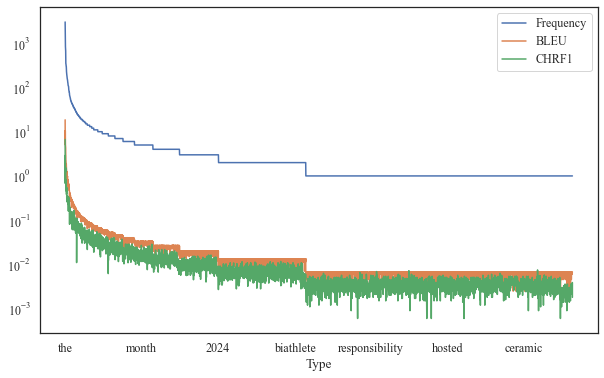

In [30]:
sns.set(rc={'figure.figsize':(10, 6)}, font="Times New Roman", style='white',font_scale=1.1)
damage.plot(x='Type', y=['Frequency', 'BLEU', 'CHRF1'], logy=True)
plt.savefig('bleu-chrf-damage.pdf')

/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


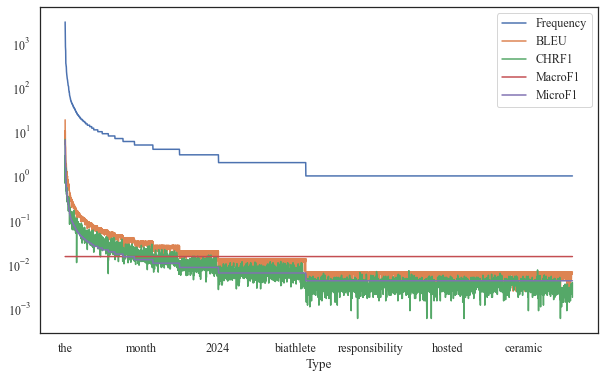

In [31]:
sns.set(rc={'figure.figsize':(10, 6)}, font="Times New Roman", style='white',font_scale=1.1)
damage.plot(x='Type', y=['Frequency', 'BLEU', 'CHRF1', 'MacroF1', 'MicroF1'], logy=True)
plt.savefig('bleu-chrf-macro-micro-damage.pdf')

/nas/home/tg/libs/miniconda3/envs/torch-3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Type'>

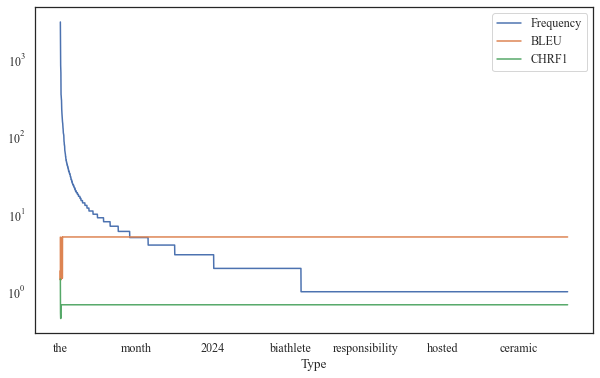

In [28]:
from scipy.interpolate import interp1d
damage_smooth = damage.copy()
for col in ['BLEU', 'CHRF1', ]:
    damage_smooth[col] = interp1d(damage_smooth.index, damage_smooth[col], kind='')(damage_smooth[col])

damage_smooth.plot(x='Type', y=['Frequency', 'BLEU', 'CHRF1'], logy=True)